![Title](Images/cisco.png)

# Lab - Descriptive Statistics in Python 


### Objectives
<p>
<li>**Part 1: Analyzing the Data**</li>
<li>**Part 2: Visualizing the Data**</li>
</p>
### Scenario/Background

In this lab, you will import a data set into a pandas frame and generate descriptive statistics from the data. You will format text strings report the descriptive statistics and generate a plot of the data. Finally, you will experiment with parameters of the graph to become familiar with plotting data using the `matplotlib.pyplot` libary.

### Required Resources

* Raspberry Pi version 2 or higher
* 1 PC with network access for connection Raspberry Pi
* Python libraries: pandas and matplotlib.pyplot
* Datafiles: rpi_describe.csv

## Part 1: Analyzing the Data

The goal of the first part of the lab is to use pandas methods to import a dataset and generate the following descriptive statistics:

1. sample size
2. mean
3. median
4. standard deviation
5. minimum, maximum, and range of values

#### Step 1: Setup the environment and import data.

First, you will import the modules and set up the enivronment to display `matplotlib` output to the notebook page. You will use `panda`s to import data from a csv file into a dataframe. You will be working with a file that contains quality control samples for a 20-ounce boxes of a food product. The data is used to check the accurracy of the machines that load the boxes.

a) Import modules and set up the environment.

In [2]:
# Code cell 1
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt

#matplotlib.use('qt5agg')

# given
%matplotlib inline

 # required on some Jupyter Notebook installations

b) Import the data from the `rpi_describe.csv` file using the pandas read_csv method. Use "data" as the name of the dataframe.

In [3]:
# Code cell 2
# import the csv into the dataframe
data = pd.read_csv("./Data/rpi_describe.csv") 


c) Check that the file imported properly by using the pandas `head` and `tail` methods for the dataframe.

In [4]:
# Code cell 3
# view the contents of the first five rows in the dataframe
data.head()

,weight
0,20.440
1,20.244
2,20.549
3,20.755
4,20.740


In [5]:
# Code cell 4
# view the contents of the last five rows in the dataframe
data.tail()

,weight
9995,20.419
9996,20.554
9997,20.768
9998,20.829
9999,20.667


From the output of the tail method, you will notice that there are 10,000 rows of data in the file. Although it is only one column, pandas handles this file very efficiently.

#### Step 2: Use pandas to view a table of descriptive statistics for the file.

pandas includes a number of powerful methods for displaying basic statistics on a dataset.

a) The `dataframe.describe()` method displays statistics for the datraframe.

In [6]:
# Code cell 5
# use the describe method of the new dataframe to view the table of statistics

data.describe()

,weight
count,10000.000000
mean,20.499212
std,0.199874
min,19.752000
25%,20.365000
50%,20.500000
75%,20.635000
max,21.171000


b) To work with rounded values for the weights in the datset, you can add a new column to the data for the rounded values. In pandas, columns are accessed by their headings. To create a new column, the name of the new column is used, in quotes, in square brackets as an index for the dataframe. The `round()` method is used to round the values in the weight column to populate a new column with the rounded values.

In [7]:
# Code cell 6
# Add a new column to the dataframe and populate it with rounded weights.
# data['rounded] = data['?'].?(?)
data['rounded'] = data['weight'].round(0)

# Verify that values were added
data

,weight,rounded
0,20.440,20.0
1,20.244,20.0
2,20.549,21.0
3,20.755,21.0
4,20.740,21.0
5,20.847,21.0
6,20.063,20.0
7,20.453,20.0
8,20.719,21.0
9,20.283,20.0


c) It is possible to fill a column with calculated values as well. For example, 

<pre><code>dataframe['c'] = dataframe['a'] - dataframe['b']</code></pre>

will result in the creation of column c in the dataframe and populate it with the difference between the numeric values in column a and b.

Create a new column in the dataframe called "diff" and populate that column with the amount of weight over or under the target value of 20 ounces. Use the rounded value for the calculation.

In [8]:
# Code cell 7
# Create the new column named "diff" and fill it with values.
data['diff'] = data['rounded'] > 20

# Check the result.
data

,weight,rounded,diff
0,20.440,20.0,False
1,20.244,20.0,False
2,20.549,21.0,True
3,20.755,21.0,True
4,20.740,21.0,True
5,20.847,21.0,True
6,20.063,20.0,False
7,20.453,20.0,False
8,20.719,21.0,True
9,20.283,20.0,False


#### Step 3: Display Descriptive Statistics in Text

In this step you will create variables to hold a series of descriptive statistics and then construct strings to display the values. You will use the following:

* `count()` 
* `mean()`
* `median()`
* `std()`
* `min()`
* `max()`

a) Use the values in the rounded column of the dataframe. Create a variable for each statistic and calculate the range of values using `min()` and `max()` to compute the range of values.

In [11]:
# Code cell 8
# Create a variables to hold values for the dataset rounded column 
count = data.rounded.count()
mean = data.rounded.mean()
median = data.rounded.median()
std = data.rounded.std()
rng = data.rounded.min()
rng1= data.rounded.max()



In [13]:
# Code cell 9
# Create variables to hold your statements.
countstring = 'The count of the distribution is {}'.format(count)
meanstring = 'The mean of the distribution is {}'.format(mean)
stdstring = 'The std of the distribution is {}'.format(std)
rangestring = 'The min is {} and the max is {}'.format(rng, rng1)



c) Use the `print` function to output all of your statements.

In [14]:
# Code cell 10
# Print all of your statements
print(countstring)
print(meanstring)
print(stdstring)
print(rangestring)


The count of the distribution is 10000
The mean of the distribution is 20.4983
The std of the distribution is 0.5000221117222929
The min is 20.0 and the max is 21.0


Look at the output for standard deviation. You can format the number so it is easier to understand the results. For example, you can change the output of the standard deviation to display only first 2 digitals after the decimal point.

Python document for formatting the strings:

https://docs.python.org/2/library/string.html

This link provides some formatting examples:

https://mkaz.tech/code/python-string-format.html

In [15]:
# Code cell 11

# Format the standard deviation result to 2 decimal points
count = data.rounded.count()
stdstring = 'The standard deviation of the distribution is {:.2f}.'.format(std)
print(stdstring)

The standard deviation of the distribution is 0.50.


## Part 2: Visualizing the Data

In this part of the lab, you will create a frequencey distribution for each unique value in the dataset.

#### Step 1: Create a dataframe that contains the frequence counts for the dataset.

a) Create a new dataframe to contain frequency counts using the `value_counts()` method. This method creates a series object, not a dataframe. The index column of this series is given by the unique values of the series, with the column name set automatically to 0. To convert a series in a DataFrame, you can use the `to_frame()` function. Additionally calling the `reset_index()` method on the resulting `DataFrame` will transform the previous index column into a new data column, whose name is automatically set to `index`. You will rename the columns later.



</font>You will use the `to_frame()` with the `reset_index()` methods to create a pandas dataframe from the series object. 

You will use the rounded column from the data dataframe with the `value_counts()` method. Example:

<pre><code>variable = dataframe['columnName'].value_counts()</code></pre>

In [16]:
# Code cell 12
# Create a variable called 'freq' to hold the weight values and their frequencies
freq = data['rounded'].value_counts()

# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()


b) Use the `type()` function with variable name as an argument to verify that `freq` is not a dataframe object.

In [17]:
# Code cell 13
# Verify the type of the freq object.

freq.describe()

,index,rounded
count,2.000000,2.000000
mean,20.500000,5000.000000
std,0.707107,24.041631
min,20.000000,4983.000000
25%,20.250000,4991.500000
50%,20.500000,5000.000000
75%,20.750000,5008.500000
max,21.000000,5017.000000


c) Use `head` to look at the new dataframe. The columns in the data frame are not named clearly. Rename them to "value" and "freq" using the columns attribute of the dataframe. Example:
<pre><code>dataframe.columns = ['column1','column2']</code></pre>

In [18]:
# Code cell 14
# Rename the columns in the dataframe. 
freq.columns = ['value','freq']
# Verify the result.
freq.describe()


,value,freq
count,2.000000,2.000000
mean,20.500000,5000.000000
std,0.707107,24.041631
min,20.000000,4983.000000
25%,20.250000,4991.500000
50%,20.500000,5000.000000
75%,20.750000,5008.500000
max,21.000000,5017.000000


#### Step 2: Plot a graph of the frequency distribution.

a) The `matplotlib.pyplot` module was imported as plt earlier in the lab. The methods from the module is used to format and display a scatter plot of the frequency data for a dataset.

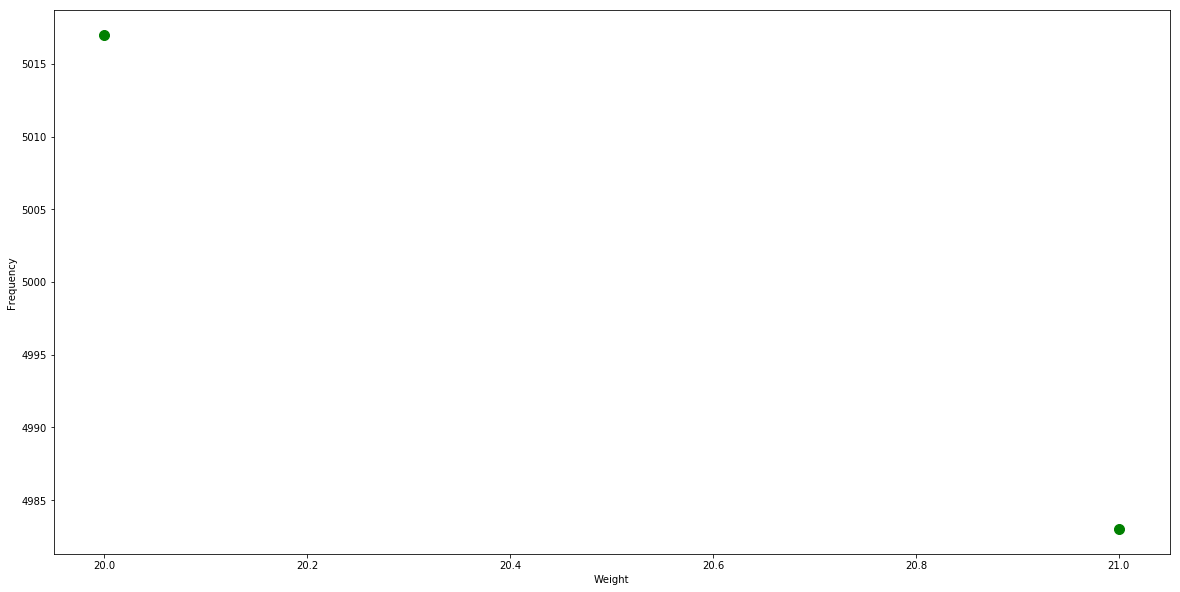

In [19]:
# Code cell 15

# Set a size for the graph
plt.figure(figsize=(20,10))

# Add axis labels
plt.ylabel('Frequency')
plt.xlabel('Weight')

# Plot the graph using a round symbol "o" of size 10
plt.plot(freq.value,freq.freq, "o", markersize = 10, color = 'g')

The frequency plot of the values resembles the one of a Gaussian distribution, centered around the value of 20.5 . In Chapter 4 you will learn how this shape is caused by both systematic and random error in the production and/or measurement systems.

b) Experiment with plotting the data with different dimensions, markers, markersizes, and colors. Use the links below for the values. You can also use the example above to try different figure dimensions.

markers http://matplotlib.org/api/markers_api.html

colors http://matplotlib.org/api/colors_api.html

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>